In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import regularizers

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive//slr/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/slr/test.csv')

y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df['label'].values

y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [ ]:
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
X_train_flat = X_train.reshape(X_train.shape[0], -1)

In [ ]:
train_data_flat = pd.DataFrame(X_train_flat)
train_data_flat['label'] = train_df['label'].values

In [ ]:
label_24_samples = train_data_flat[train_data_flat['label'] == 24]
print("Samples with label 24:\n", label_24_samples)

Samples with label 24:
               0         1         2         3         4         5         6  \
26     0.580392  0.600000  0.611765  0.615686  0.619608  0.619608  0.619608   
130    0.713725  0.713725  0.713725  0.717647  0.717647  0.721569  0.721569   
140    0.333333  0.364706  0.388235  0.415686  0.447059  0.470588  0.482353   
164    0.627451  0.643137  0.658824  0.678431  0.682353  0.690196  0.705882   
213    0.486275  0.494118  0.509804  0.513725  0.517647  0.525490  0.533333   
...         ...       ...       ...       ...       ...       ...       ...   
27325  0.666667  0.670588  0.678431  0.682353  0.694118  0.701961  0.709804   
27371  0.658824  0.678431  0.698039  0.705882  0.717647  0.737255  0.741176   
27378  0.827451  0.835294  0.835294  0.843137  0.847059  0.847059  0.850980   
27407  0.831373  0.831373  0.831373  0.831373  0.835294  0.839216  0.835294   
27418  0.682353  0.694118  0.701961  0.705882  0.705882  0.717647  0.717647   

              7         8  

Label: 3


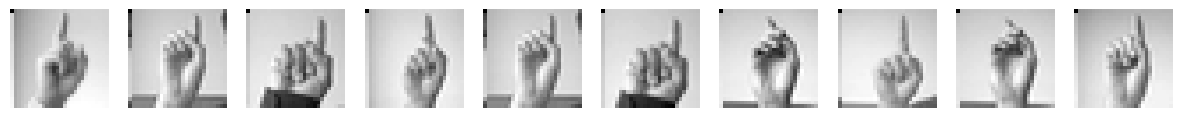

Label: 6


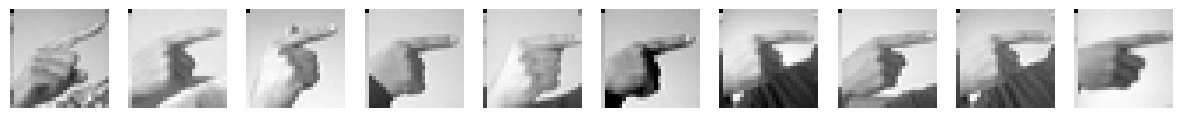

Label: 2


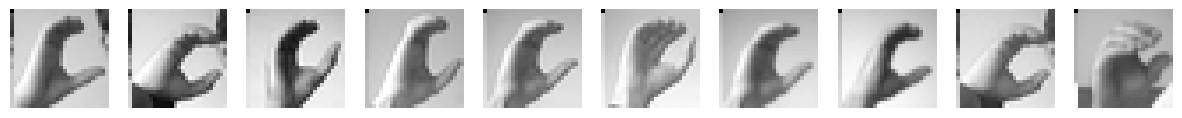

Label: 13


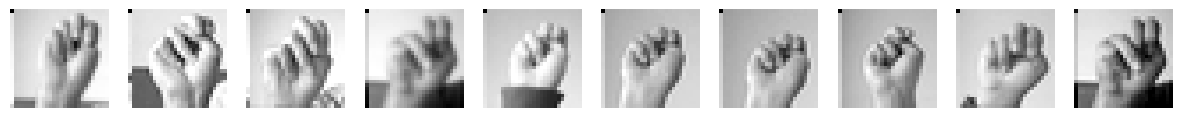

Label: 16


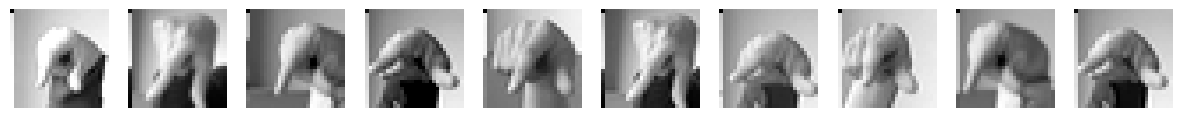

Label: 8


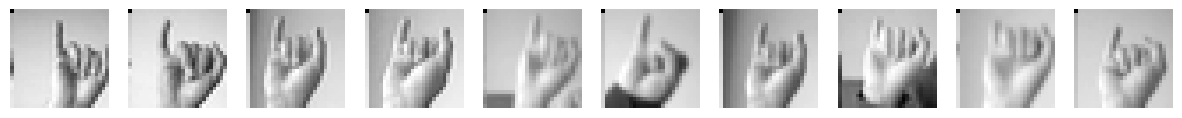

Label: 22


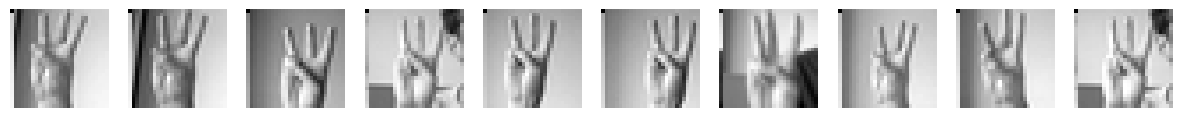

Label: 18


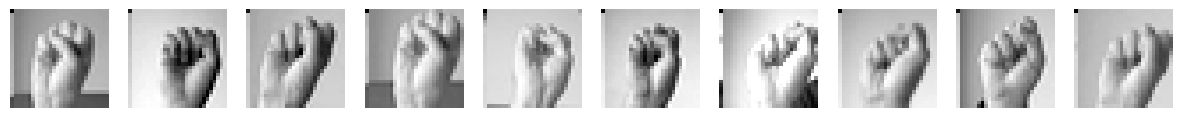

Label: 10


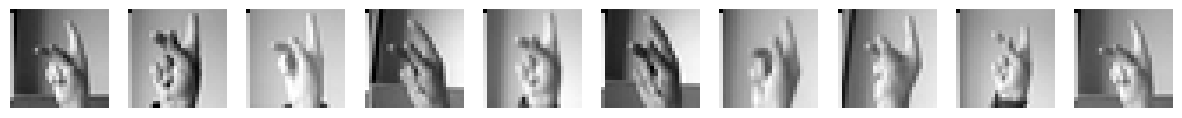

Label: 20


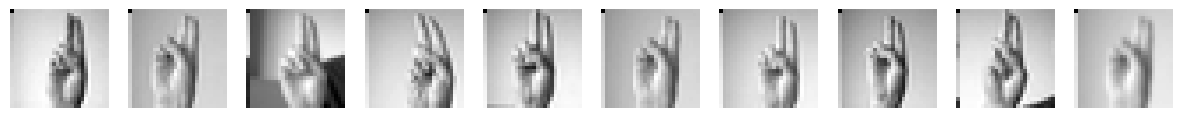

Label: 17


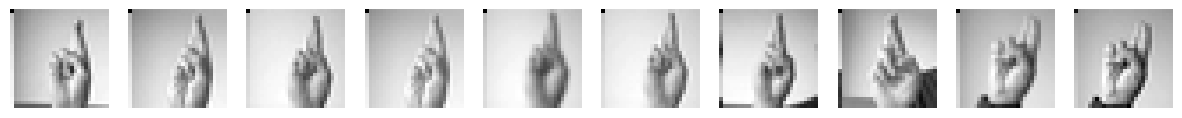

Label: 19


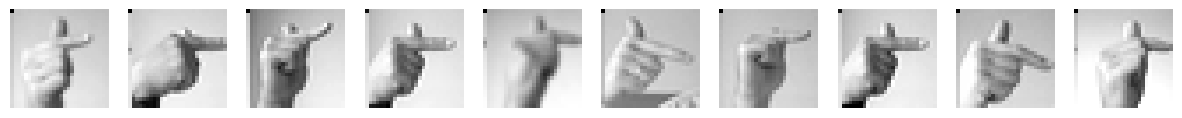

Label: 21


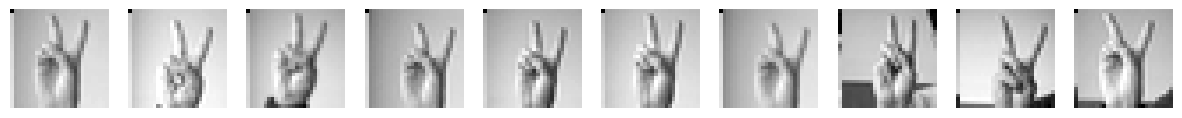

Label: 23


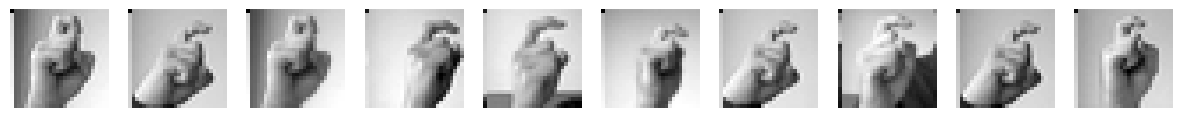

Label: 24


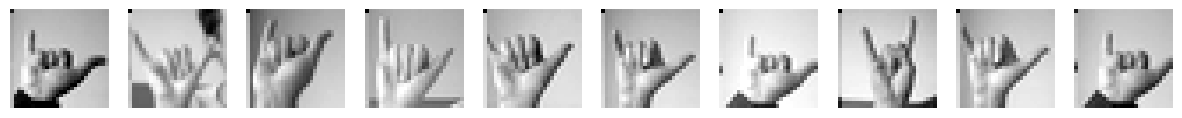

Label: 1


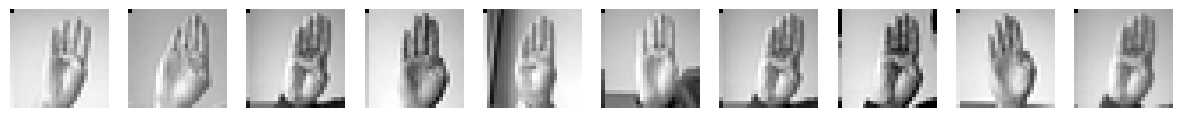

Label: 12


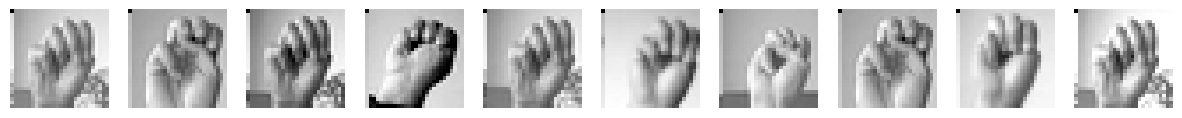

Label: 11


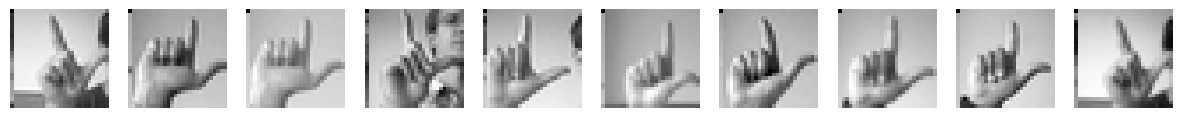

Label: 15


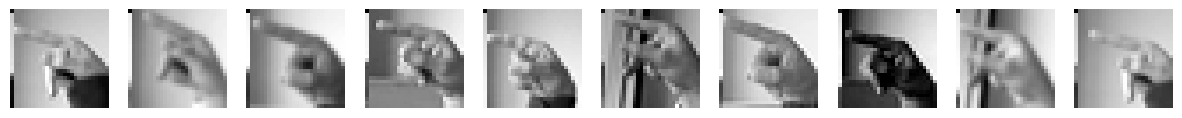

Label: 4


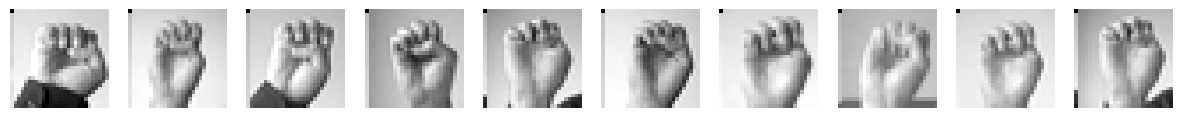

Label: 0


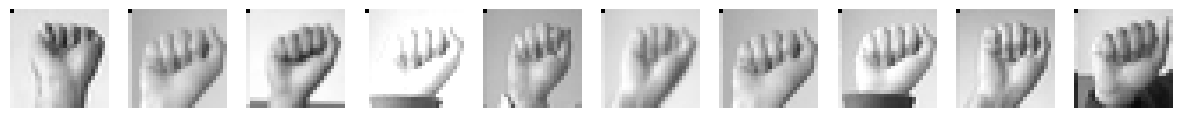

Label: 5


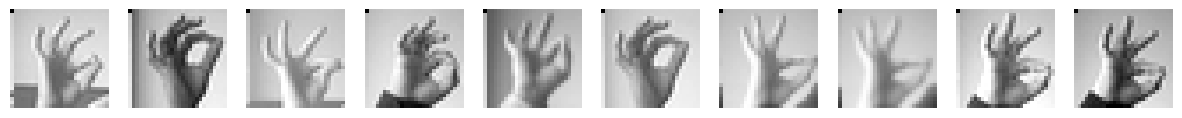

Label: 7


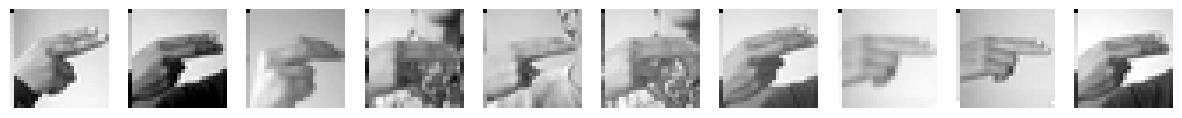

Label: 14


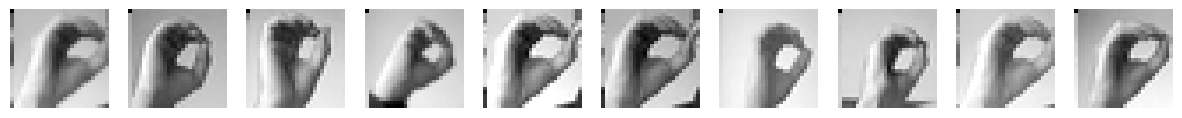

In [ ]:
unique_labels = train_df['label'].unique()

for label in unique_labels:
    label_samples = train_df[train_df['label'] == label]

    print(f"Label: {label}")
    fig, axes = plt.subplots(1, min(10, len(label_samples)), figsize=(15, 2))

    for i in range(min(10, len(label_samples))):
        image_data = label_samples.iloc[i, :-1].values.reshape(28, 28)
        axes[i].imshow(image_data, cmap='gray')
        axes[i].axis('off')

    plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(25, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,017 (519.60 KB)

 Trainable params: 132,569 (517.85 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.3637 - loss: 3.0560 - val_accuracy: 0.5618 - val_loss: 1.9239 - learning_rate: 0.0010
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7733 - loss: 1.1734 - val_accuracy: 0.8447 - val_loss: 0.9259 - learning_rate: 0.0010
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8269 - loss: 0.9774 - val_accuracy: 0.7047 - val_loss: 1.4079 - learning_rate: 0.0010
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8515 - loss: 0.8931 - val_accuracy: 0.8970 - val_loss: 0.7216 - learning_rate: 0.0010
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8608 - loss: 0.8736 - val_accuracy: 0.9106 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8731 - loss: 0.8310 - val_accuracy: 0.9374 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8826 - loss: 0.8043

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


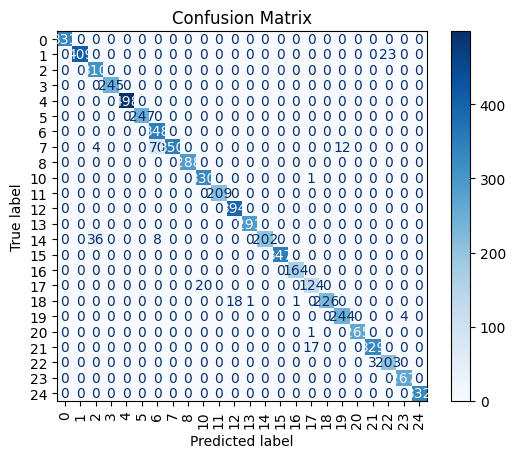

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming y_true and y_pred are your true labels and predictions
y_true = np.argmax(y_test, axis=1)  # True labels
y_pred = np.argmax(model.predict(X_test), axis=1)  # Predicted labels

# Get unique labels from your true and predicted values
# This ensures the confusion matrix size and labels match
unique_labels = np.unique(np.concatenate((y_true, y_pred)))

# Define the labels for your classes based on unique values
labels = [str(i) for i in unique_labels]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels) #specify labels here
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.3205
Test Loss: 0.3088
Test Accuracy: 0.9695


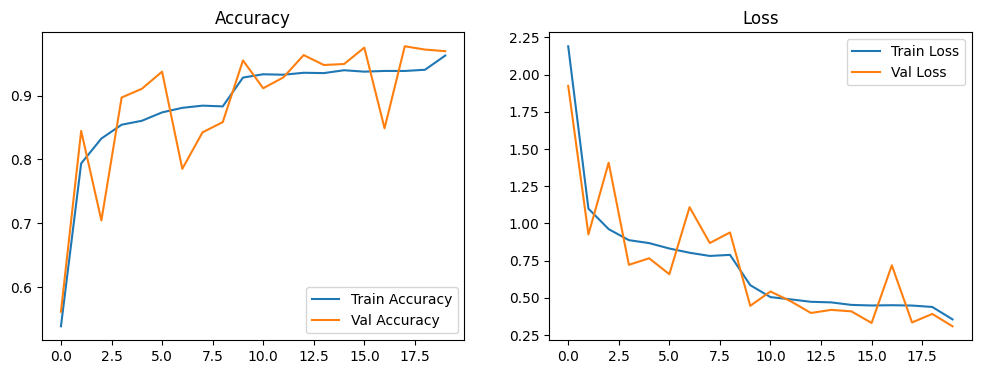

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [ ]:
model_save_path = '/content/drive/MyDrive/sign_language_model.h5'

model.save(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/sign_language_model.h5
